## Import packages:

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
import gensim
import re
import unicodedata
import datetime
import collections
import random
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import pylab
from gensim.models.phrases import Phraser
from gensim.models import Phrases
from sklearn.manifold import TSNE
import treetaggerwrapper
import string
import os
import platform
treetaggerPath = str(os.getcwd()) + "/treetagger/" + str(platform.system()) + "/"

In [2]:
treetaggerPath

'/home/francesco/workspace/git/TISProject/NB_Presentazione/treetagger/Linux/'

## Load dataset:

In [3]:
trains24 = pd.read_csv("../Dataset/articoliS24O.csv", delimiter="\t")
trainRadiocor = pd.read_csv("../Dataset/articoliRadiocor.csv", delimiter='\t')

In [4]:
colsel_trains24 = trains24[['identificativo', 'body']]

In [5]:
colsel_trainRadiocor = trainRadiocor[['identificativo', 'body']]

## Data Exploration:

In [6]:
dim_init_s24 = colsel_trains24.shape
dim_init_s24

(3265, 2)

In [7]:
dim_init_radiocor = colsel_trainRadiocor.shape
dim_init_radiocor

(6916, 2)

In [8]:
colsel_merged = pd.concat([colsel_trains24, colsel_trainRadiocor])

In [9]:
colsel_merged.dropna(inplace=True)
colsel_merged = colsel_merged.reset_index()
colsel_merged = colsel_merged.drop('index', axis=1)

In [10]:
print(colsel_merged[colsel_merged['identificativo']=='FM20160827022ADDGKkAB']['body'].values)

[ 'La saga continua. Nonostante che tutti sappiano come va a finire. Ma il commissario europeo che si occupa di policy digitale, Günther Oettinger, non ne è al corrente, evidentemente. La saga è quella degli editori che si sentono defraudati di un diritto a causa dei motori di ricerca - cioè di Google -  che propongono ai lettori qualche riga dei loro articoli insieme ai link per trovarli online. Oettinger sta studiando una proposta di direttiva che dà agli editori il diritto di chiedere un compenso per quelle righe di testo. Forse pensa così di apparire come l’eroe della saga, l’innovatore che risolve un problema a lungo dibattuto. Invece, arriva ultimo. E dopo che questo genere di soluzione è già fallito in Spagna e in Germania. Ma è veramente possibile che non lo sappia? E il vice presidente della Commissione, Andrus Ansip, che conosce il digitale molto meglio di Oettinger e che si occupa del mercato unico digitale, non gli ha detto nulla? In realtà, la realtà digitale va troppo vel

In [11]:
print(colsel_merged[colsel_merged['identificativo']=='FM20151009036ACmwyfCB']['body'].values)

[ "Pietro Scott Jovane lascia la poltrona di amministratore delegato di RcsMedia Group. Al termine di una giornata fitta di incontri e partita in prima mattinata con il summit con le banche creditrici per la rinegoziazione del debito, il consiglio di amministrazione del gruppo editoriale ha comunicato l'uscita «consensuale» di Scott Jovane a partire dal prossimo 15 ottobre e l'assegnazione delle deleghe di Jovane ad interim al presidente Maurizio Costa.\u200e«Il cda di Rcs MediaGroup - si legge in una nota - ha preso atto della volontà dell'ad Pietro Scott Jovane di lasciare il proprio incarico, ritenendo concluso un ciclo della vita aziendale e manifestando l'intenzione di intraprendere un nuovo percorso professionale».\u200e Inoltre il consiglio ha comunicato che per la risoluzione del contratto saranno corrisposte 150 mila euro al manager, a cui si sommano 600 mila euro lordi per il patto di non concorrenza.Il board, iniziato alle 17.30 in via Rizzoli, nella sede centrale di Rcs Med

## Null Values:

In [12]:
dim_after_s24 = colsel_trains24.dropna().shape
dim_after_radiocor = colsel_trainRadiocor.dropna().shape

null_s24 = dim_init_s24[0]-dim_after_s24[0]
non_Null_s24 = dim_init_s24[0]- null_s24

null_radiocor = dim_init_radiocor[0]- dim_after_radiocor[0]
non_Null_radiocor = dim_init_radiocor[0]- null_radiocor

print ("Number of null/empty articles of S24: "
       + str(null_s24))
print ("Number of null/empty articles of Radiocor: " 
       + str(null_radiocor))

Number of null/empty articles of S24: 31
Number of null/empty articles of Radiocor: 0


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go 

'''For running Plotly, you need to sign up at the Plotly's website and 
    in order to have the api key, once you got it you need to 
    modify the file ~/.plotly/.credentials with yours'''

trace1 = go.Bar(
    x=['Sole 24 Ore', 'Radiocor'],
    y=[non_Null_s24, non_Null_radiocor],
    name='Articoli'
)
trace2 = go.Bar(
    x=['Sole 24 Ore', 'Radiocor'],
    y=[null_s24, null_radiocor],
    name='Articoli Nulli'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Wordcloud corpus:

In [14]:
def wordcloud(dataframe, stopwords):
    data = " ".join([i for i in dataframe.str.upper()])
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 40
    fig_size[1] = 30
    wordcloud = WordCloud(width= 4000, height= 2000, background_color="white", 
                          stopwords = stopwords).generate(data)
    plt.imshow(wordcloud)
    plt.figure
    plt.axis("off")
    plt.title("Wordcloud")
    plt.show()

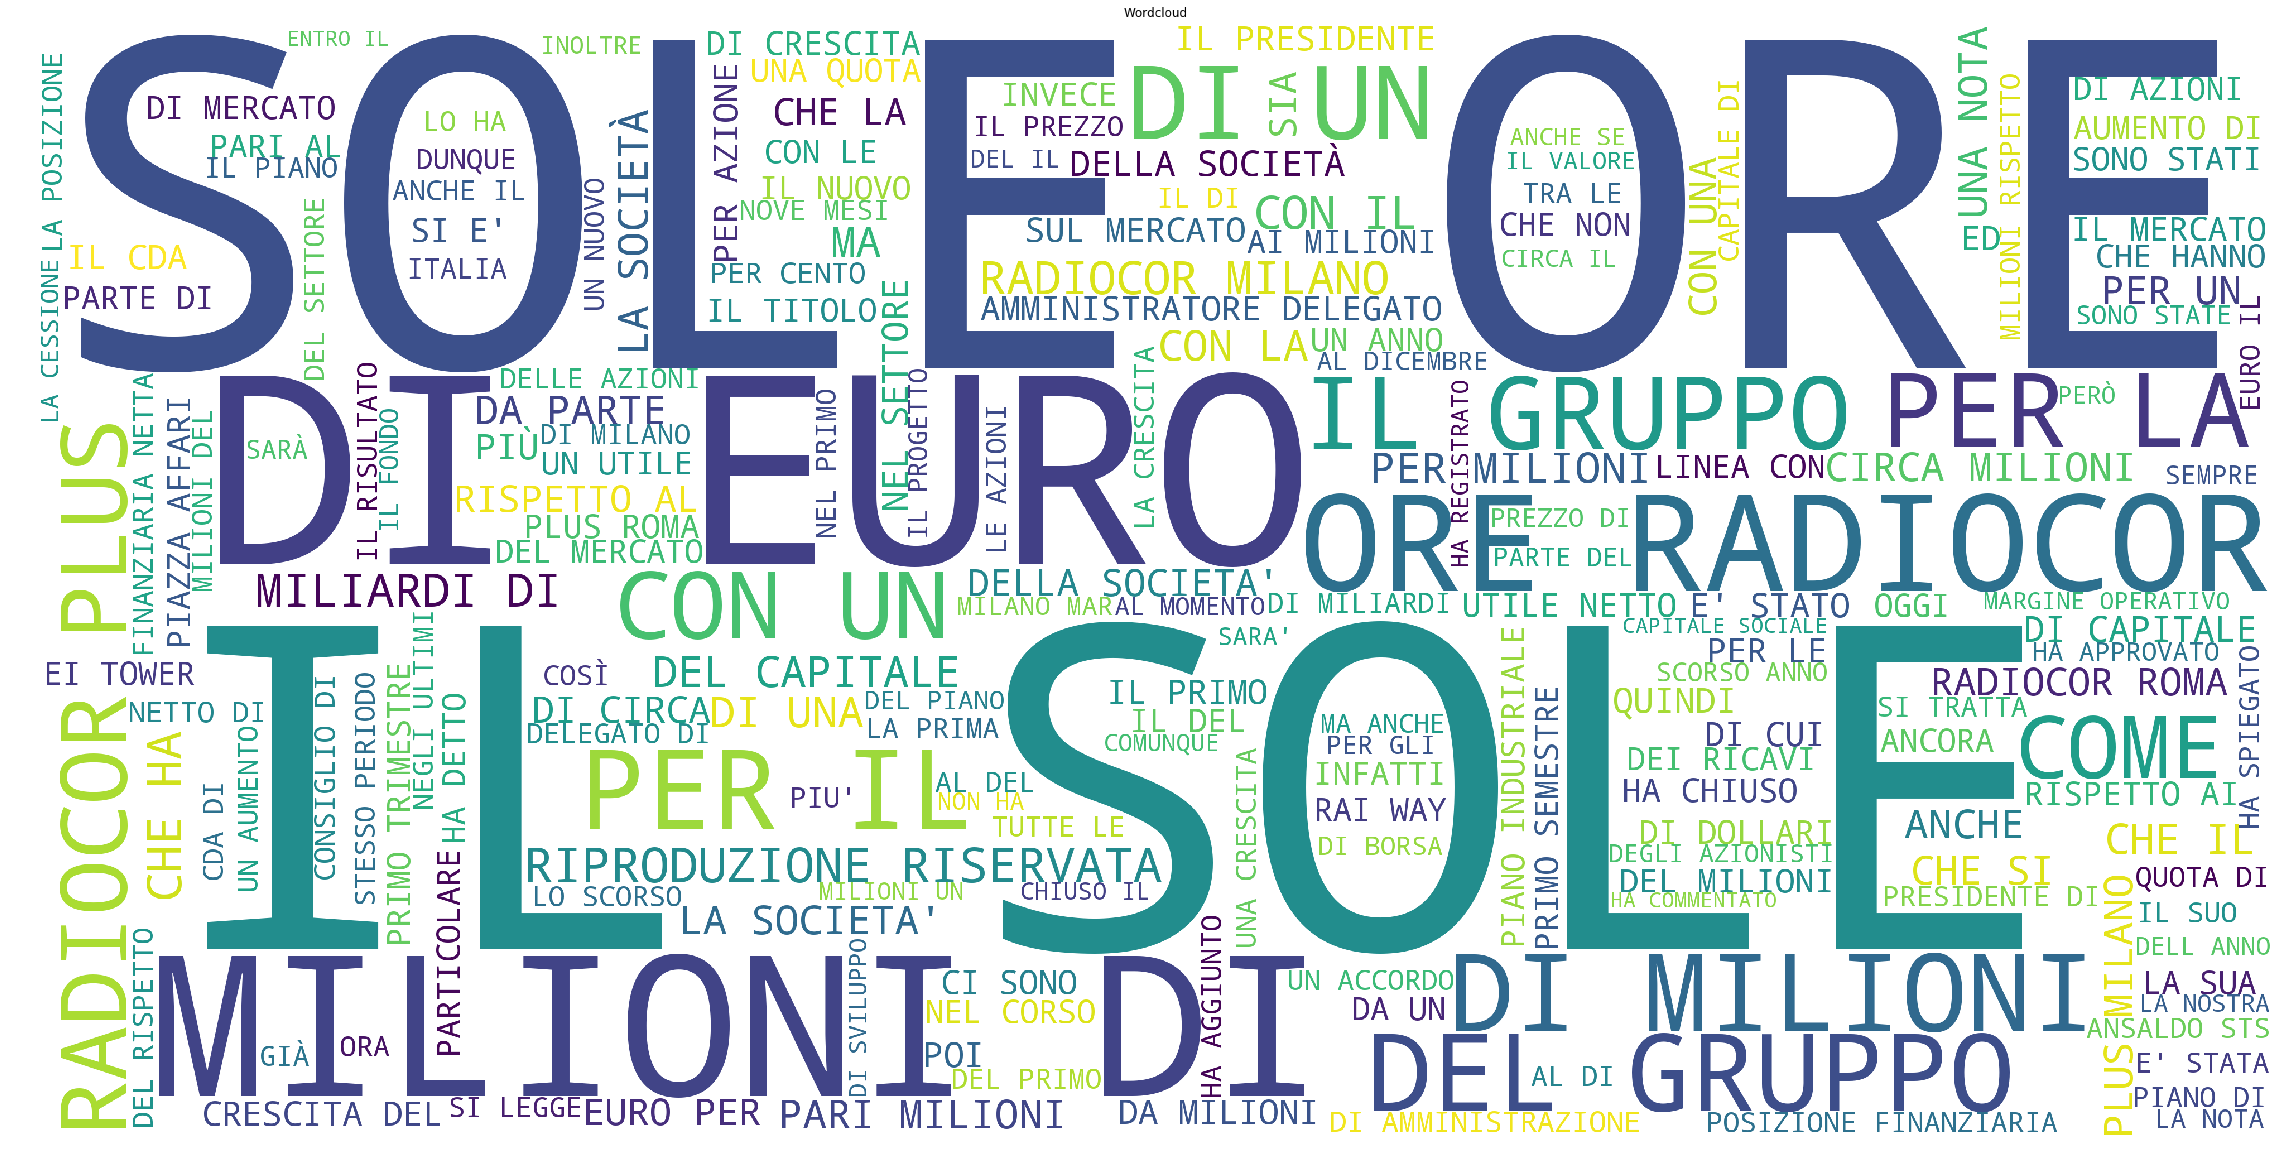

In [15]:
wc = wordcloud(colsel_merged['body'], None)

## First BOW:

In [16]:
def build_BOW(corpus):
    '''The corpus to be fed into should be a list!'''
    all_words = [w for t in corpus for w in t.split()]
    freq = nltk.FreqDist(all_words)
    return freq

In [17]:
freq_words = build_BOW(colsel_merged['body'].tolist())

In [18]:
#Top most 10 words 
print(freq_words.most_common(10))
print('Distinct words: '+ str(freq_words.B()))
print('Total number of words: '+ str(freq_words.N()))

[('di', 117177), ('e', 49634), ('il', 45864), ('a', 42848), ('del', 40684), ('in', 39275), ('la', 34193), ('che', 33784), ('per', 33426), ('un', 27461)]
Distinct words: 129115
Total number of words: 2455640


In [19]:
top_10_freq = freq_words.most_common(10)
tot_lasts = freq_words.N() - sum([elem[1] for elem in top_10_freq])

labels = [elem[0] for elem in top_10_freq]
labels.append('Rimanenti')
values = [elem[1] for elem in top_10_freq]
values.append(tot_lasts)

trace=go.Pie(labels=labels,values=values)

py.iplot([trace])

## Impact of Stopwords onto the coprus:

In [20]:
stopw = set(stopwords.words("italian"))
puntk = set(string.punctuation)
direct = set('«') | set('»') | set('“') | set('”')
removal = stopw | puntk | direct
print(removal)

{'li', '“', 'stessimo', 'avuto', 'fosse', '«', '@', 'stessero', 'avete', 'facesti', 'sono', 'del', 'coi', 'avessimo', 'quante', 'sto', 'stiate', 'dagl', 'su', 'ebbero', 'questi', 'sullo', 'faccio', 'avevano', 'contro', 'avrete', 'facemmo', 'quanti', 'avrà', 'starebbe', 'dov', 'ai', 'o', '.', 'gli', 'stesti', 'facessero', '`', 'sarà', 'i', 'farete', 'si', 'fossimo', 'fui', '#', 'avevate', '}', 'nei', ']', 'quale', 'fareste', 'fummo', 'nel', 'avranno', 'c', 'avendo', 'dagli', 'avrò', ':', 'farai', 'avreste', '<', 'starebbero', 'staresti', 'avuta', '&', '{', 'stessi', 'furono', 'stavano', '/', 'fu', 'staremo', 'ero', 'vostra', 'siate', 'saranno', 'facciamo', 'era', 'vostro', 'dove', 'queste', 'nello', 'ti', '=', 'avrebbero', 'sarebbero', 'quello', 'ebbe', 'sua', '%', 'stareste', 'saremmo', 'faccia', 'noi', 'fosti', 'facessimo', 'un', 'avute', 'tu', 'lui', 'stavamo', 'sareste', 'dall', 'stavi', 'cui', 'avuti', 'nostri', 'e', 'starete', 'starai', 'ma', 'stiamo', 'eri', '[', 'stavate', 'star

In [21]:
removal_count = []
tot_rem = 0
for r in removal:
    freq_r = freq_words[r]
    tot_rem += freq_r
    removal_count.append((r,freq_r))

remaining_words= freq_words.N() - tot_rem
print(remaining_words)
print(tot_rem)

labels = [elem[0] for elem in removal_count]
labels.append('Rimanenti')
values = [elem[1] for elem in removal_count]
values.append(remaining_words)

trace=go.Pie(labels=labels,values=values)

py.iplot([trace])

1578933
876707


## Clean dataset:

In [22]:
print("SHAPE BEFORE REMOVING DUPLICATES: " + str(colsel_merged.shape)) 
colsel_merged.drop_duplicates(inplace=True) 
print("SHAPE AFTER REMOVING DUPLICATES: " + str(colsel_merged.shape))

colsel_merged['body'] = colsel_merged['body'].apply(lambda x : str(x).lower())
colsel_merged['body'] = colsel_merged['body'].str.replace(r'(\\)+[a-z]\{[0-9]+\}','')
colsel_merged['body'] = colsel_merged['body'].str.replace('\n','')

#handle percentages
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: str(re.sub(r'([0-9]+)((\,|\.)[0-9]+)?((\s)?per(\s)?cento|(\s)?%)',r'\1_percento',str(x))))

#removing contracted articles and prepositions
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: str(re.sub(r'[a-zA-Z]+\’',r' ',str(x))))
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: str(re.sub(r'[a-zA-Z]+\'',r' ',str(x))))
colsel_merged['body'] = colsel_merged['body'].str.replace(r'(il)?( )?sole( )?24( )?ore','sole24ore')

#replace abbreviation
colsel_merged['body'] = colsel_merged['body'].str.replace('p/e','price_earnings_ratio')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'mld', 'miliardi')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'mln', 'milioni')

#taking in account quanties
colsel_merged['body'] = colsel_merged['body'].str.replace(r'milione', 'milioni')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'miliardo', 'miliardi')
colsel_merged['body'] = colsel_merged['body'].apply(
    lambda x: re.sub(r'([1-9]+)(\,|\.)[0-9]+ ?((milion(i|e)|miliard(i|o)|mila|euro))', r'\1 \3', x))

#remove useless endings
colsel_merged['body'] = colsel_merged['body'].str.replace(r'\(c.fe.\)','')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'((\()?( )?sole24ore (radiocor)?( plus)?( )?(\))?.\-.*?)\-','')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'(continua (da )?pagina [0-9]+)© riproduzione riservata(continua (da )?pagina [0-9]+)', '')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'((© )?riproduzione riser(vata)?).*','')

#format urls
colsel_merged['body'] = colsel_merged['body'].str.replace(r'(www\.|http\:\/\/|https\:\/\/|\.com|\.net|\.org|\.it|@[a-zA-Z]+)','')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','')  

#format dots for pos_tagging, done in order to mess up with urls!
colsel_merged['body'] = colsel_merged['body'].str.replace(r':',' : ')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'[a-zA-Z]+\'',' ')
colsel_merged['body'] = colsel_merged['body'].str.replace(r'.','. ')
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: re.sub(r'([a-z]+)\.([a-z][a-z]+)', r'\1. \2', x))
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: re.sub(r'([a-z]+)\.\D',r'\1 ', x))
colsel_merged['body'] = colsel_merged['body'].str.replace(r'( )+',' ')

#adjusted html tags cleaning! 2 is the magic number
for _ in np.arange(2):
    colsel_merged['body'] = colsel_merged['body'].apply(lambda x: str(BeautifulSoup(x,"lxml").text))
    
#escaping &
colsel_merged['body'] = colsel_merged['body'].apply(lambda x: str(re.sub(r'( )?\&( )?','and',str(x))))


#removing unprintable unicode
colsel_merged['body'].replace('\u200e','',regex=True,inplace=True)

SHAPE BEFORE REMOVING DUPLICATES: (10150, 2)
SHAPE AFTER REMOVING DUPLICATES: (9283, 2)


In [23]:
tmp= colsel_merged[colsel_merged['identificativo']=='FM20151009036ACmwyfCB']['body'].values
print(tmp)

[ 'pietro scott jovane lascia la poltrona di amministratore delegato di rcsmedia group al termine di una giornata fitta di incontri e partita in prima mattinata con il summit con le banche creditrici per la rinegoziazione del debito, il consiglio di amministrazione del gruppo editoriale ha comunicato uscita «consensuale» di scott jovane a partire dal prossimo 15 ottobre e assegnazione delle deleghe di jovane ad interim al presidente maurizio costa «il cda di rcs mediagroup - si legge in una nota - ha preso atto della volontà ad pietro scott jovane di lasciare il proprio incarico, ritenendo concluso un ciclo della vita aziendale e manifestando intenzione di intraprendere un nuovo percorso professionale».  inoltre il consiglio ha comunicato che per la risoluzione del contratto saranno corrisposte 150 mila euro al manager, a cui si sommano 600 mila euro lordi per il patto di non concorrenza il board, iniziato alle 17. 30 in via rizzoli, nella sede centrale di rcs mediagroup, dopo la riuni

In [24]:
print(colsel_merged[colsel_merged['identificativo']=='FM20160827022ADDGKkAB']['body'].values)

[ 'la saga continua nonostante che tutti sappiano come va a finire ma il commissario europeo che si occupa di policy digitale, günther oettinger, non ne è al corrente, evidentemente la saga è quella degli editori che si sentono defraudati di un diritto a causa dei motori di ricerca - cioè di google - che propongono ai lettori qualche riga dei loro articoli insieme ai link per trovarli online oettinger sta studiando una proposta di direttiva che dà agli editori il diritto di chiedere un compenso per quelle righe di testo forse pensa così di apparire come eroe della saga, innovatore che risolve un problema a lungo dibattuto invece, arriva ultimo e dopo che questo genere di soluzione è già fallito in spagna e in germania ma è veramente possibile che non lo sappia? e il vice presidente della commissione, andrus ansip, che conosce il digitale molto meglio di oettinger e che si occupa del mercato unico digitale, non gli ha detto nulla? in realtà, la realtà digitale va troppo veloce per i tem

## Generate verb tokens:

In [25]:
def clean_tag(tt):
    if(len(tt)<3):
        print(tt[0])
    if(tt[2]=='@card@' or tt[2]=='@ord@'):
        return tt[0]
    else:
        return re.sub(r'[a-z]+\|','',tt[2])

In [26]:
def merge_auxiliary_verbs(current, succ, flag):
    if flag==0:
        if clean_tag(current)=='essere' and succ[1].startswith('VER:'):
            temp = clean_tag(current) + "_" + clean_tag(succ)
            flag = 1
            return temp, flag
        return clean_tag(current), flag
    else:
        flag = 0
        return clean_tag(succ), flag

In [27]:
def pos_tagger_ita(lst):
    corpus = {}
    stopw = set(stopwords.words("italian"))
    puntk = set(string.punctuation)
    direct = set('«') | set('»') | set('“') | set('”')
    rem = stopw | puntk | direct
    tagger = treetaggerwrapper.TreeTagger(TAGLANG='it', TAGDIR=treetaggerPath)
    for txt in lst:
        tagged_txt = []
        tags=tagger.tag_text(txt[1])
        pp_tags= treetaggerwrapper.make_tags(tags)
        flag = 0
        for idx,t in enumerate(pp_tags):
            if idx != len(pp_tags):
                t_succ = pp_tags[(idx + 1) % len(pp_tags)]
                txt_tmp, flag = merge_auxiliary_verbs(t, t_succ, flag)
                if (txt_tmp not in rem):                
                    tagged_txt.append(txt_tmp)
        corpus[txt[0]]= tagged_txt
    return corpus

In [28]:
t1= time.time()
list_corp = colsel_merged[['identificativo','body']].values.tolist()
corp = pos_tagger_ita(list_corp)
print('Lemmatisation done in '+ str(round((time.time()-t1)/60, 0)) + ' min')

Lemmatisation done in 2.0 min


In [29]:
corp_string = {}
for k in corp.keys():
    corp_string[k] = ' '.join(corp[k])
    
cleaned_corpus = pd.DataFrame([v for v in corp_string.values()], columns = ['body'],
                    index = [k for k in corp_string.keys()])
print(cleaned_corpus.loc['FM20160501023ACLAzwID'].body)
cleaned_corpus.head(2)

unico certezza momento essere prossimo tappa scattare prima 31 maggio entro data infatti presidente sace ex ambasciatore giovanni castellaneta dovere riconvocare assemblea socio venerdì scorso essere_chiudere approvare approvare bilancio 2015 cedola 310 milione cassa senza rinnovare organo sociale passaggio testimone dunque servire altro round orientamento emergere finora giudicare voce ricorrere ultimo settimana essere puntare discontinuità attuale vertice presidente castellaneta amministratore delegare alessandro castellano artefice ultimo prima direttore generale responsabilità sviluppo business poi 2007 trasformazione sace ente pubblico spa attuale modello business avere portare essere società credito esportazione best practice mercato grado distribuire azionista cdp 2012 oggi oltre 2 miliardo euro cedola riduzione capitale andare quindi verso ricambio guida società futuro definire ultimo piano industriale cdp prevedere integrazione sace simest export cassa sotto cappello spa via g

,body
FM20160429032ACC9MUHD,acea essere pronto giocare partita banda ultra...
FM20160501023ACLAzwID,unico certezza momento essere prossimo tappa s...


## WordCloud after Cleaning:

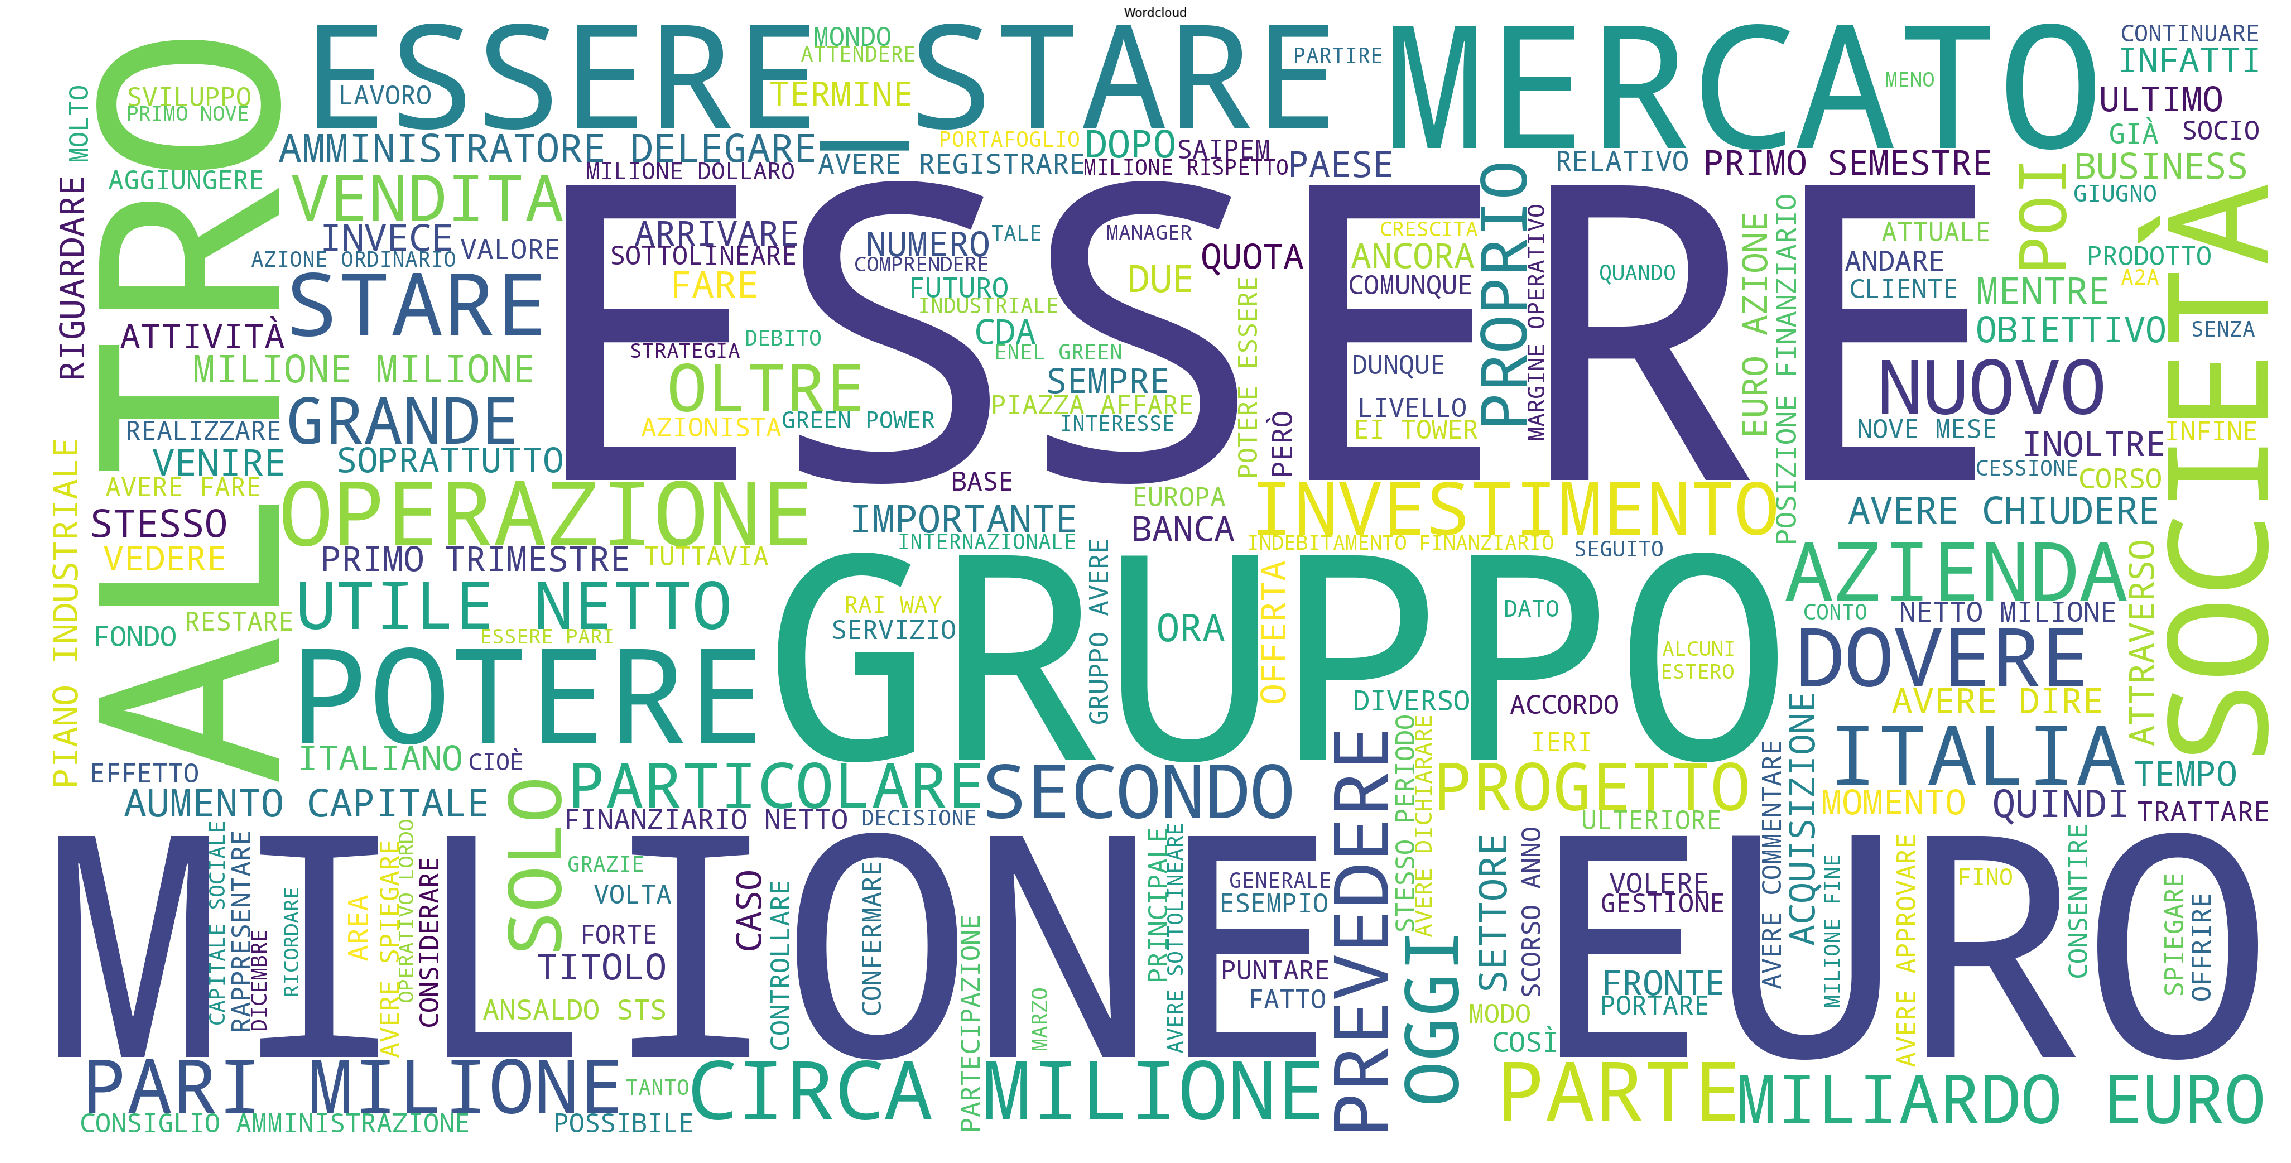

In [30]:
wc = wordcloud(cleaned_corpus['body'], None)

## New BOW:

In [31]:
new_bow = build_BOW(cleaned_corpus['body'].tolist())

top_10_freq = new_bow.most_common(10)
tot_lasts = new_bow.N() - sum([elem[1] for elem in top_10_freq])

labels = [elem[0] for elem in top_10_freq]
labels.append('Rimanenti')
values = [elem[1] for elem in top_10_freq]
values.append(tot_lasts)

trace=go.Pie(labels=labels,values=values)

py.iplot([trace])

cleaned_corpus.to_csv('./Dataset/cleaned_data.csv', sep='\t')